In [1]:
library(haven)
library(lavaan)
library(psych)
library(semTools)

Warning message:
"package 'haven' was built under R version 4.1.3"
Warning message:
"package 'lavaan' was built under R version 4.1.3"
This is lavaan 0.6-11
lavaan is FREE software! Please report any bugs.


Attaching package: 'psych'


The following object is masked from 'package:lavaan':

    cor2cov


Warning message:
"package 'semTools' was built under R version 4.1.3"
 

###############################################################################

This is semTools 0.5-6

All users of R (or SEM) are invited to submit functions or ideas for functions.

###############################################################################


Attaching package: 'semTools'


The following objects are masked from 'package:psych':

    reliability, skew




In [2]:
setwd("C://Users//jihan//Downloads")
data_location <- "Kenny BC Survey_allCovid_v2.sav"

raw_data <- read_sav(data_location)
dt <- cbind(raw_data$CovidStatus,raw_data$SSS,raw_data$SES,raw_data$TotCBarRacGen,raw_data$TotEBarRac,
            raw_data$TotBelong,raw_data$TotRelatCommCol,
            raw_data$WoVol1,raw_data$WoVol2,raw_data$WoVol3,raw_data$WoVol4,
            raw_data$WoVol5,raw_data$WoVol6,raw_data$WoVol7)
colnames(dt) <- c('CovidStatus','SSS','SES','TotCBarRacGen','TotEBarRac','TotBelong','TotRelatCommCol',
                  'WoVol1','WoVol2','WoVol3','WoVol4','WoVol5','WoVol6','WoVol7')

In [16]:
model0 <- '
  social_class =~ SSS + SES
  marginalization =~ TotCBarRacGen + TotEBarRac
  work_volition =~ WoVol1 + WoVol2 + WoVol3 + WoVol4 + WoVol5 + WoVol6 + WoVol7
  school_belonging =~ TotBelong + TotRelatCommCol

  school_belonging ~~ social_class + marginalization + work_volition
  social_class ~~ marginalization + work_volition
  marginalization ~~ work_volition
'

# Estimate the model parameters
fit0 <- sem(model0, data = dt, meanstructure=TRUE, std.lv=TRUE, group = 'CovidStatus')

# View the model results
summary(fit0,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)

Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


lavaan 0.6-11 ended normally after 79 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        90
                                                      
  Number of observations per group:                   
    1                                              476
     2                                             272
                                                      
Model Test User Model:
                                                      
  Test statistic                               330.025
  Degrees of freedom                               118
  P-value (Chi-square)                           0.000
  Test statistic for each group:
    1                                          199.260
     2                                         130.765

Model Test Baseline Model:

  Test statistic                              2446.632
  Degrees of freedom                    

In [17]:
inspect(fit0)

,social_class,marginalization,work_volition,school_belonging
SSS,1,0,0,0
SES,2,0,0,0
TotCBarRacGen,0,3,0,0
TotEBarRac,0,4,0,0
WoVol1,0,0,5,0
WoVol2,0,0,6,0
WoVol3,0,0,7,0
WoVol4,0,0,8,0
WoVol5,0,0,9,0
WoVol6,0,0,10,0


In [18]:
model1 <- '
  social_class =~ SSS + SES
  marginalization =~ TotCBarRacGen + TotEBarRac
  work_volition =~ WoVol1 + WoVol2 + WoVol3 + WoVol4 + WoVol5 + WoVol6 + WoVol7
  school_belonging =~ TotBelong + TotRelatCommCol

  school_belonging ~~ c(a,a)*social_class + marginalization + work_volition
  social_class ~~ marginalization + work_volition
  marginalization ~~ work_volition
'

# Estimate the model parameters
fit1 <- sem(model1, data = dt, meanstructure=TRUE, std.lv=TRUE, group = 'CovidStatus')

# View the model results
summary(fit1,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)
lavTestLRT(fit0,fit1) 

lavaan 0.6-11 ended normally after 70 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        90
  Number of equality constraints                     1
                                                      
  Number of observations per group:                   
    1                                              476
     2                                             272
                                                      
Model Test User Model:
                                                      
  Test statistic                               337.838
  Degrees of freedom                               119
  P-value (Chi-square)                           0.000
  Test statistic for each group:
    1                                          201.573
     2                                         136.266

Model Test Baseline Model:

  Test statistic                        

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit0,118,35011.79,35427.36,330.0252,NA,NA,NA
fit1,119,35017.61,35428.56,337.8384,7.813237,1,0.005186492


In [19]:
model2 <- '
  social_class =~ SSS + SES
  marginalization =~ TotCBarRacGen + TotEBarRac
  work_volition =~ WoVol1 + WoVol2 + WoVol3 + WoVol4 + WoVol5 + WoVol6 + WoVol7
  school_belonging =~ TotBelong + TotRelatCommCol

  school_belonging ~~ social_class + c(b,b)*marginalization + work_volition
  social_class ~~ marginalization + work_volition
  marginalization ~~ work_volition
'

# Estimate the model parameters
fit2 <- sem(model2, data = dt, meanstructure=TRUE, std.lv=TRUE, group = 'CovidStatus')

# View the model results
summary(fit2,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)
lavTestLRT(fit0,fit2) 

Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


lavaan 0.6-11 ended normally after 72 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        90
  Number of equality constraints                     1
                                                      
  Number of observations per group:                   
    1                                              476
     2                                             272
                                                      
Model Test User Model:
                                                      
  Test statistic                               333.332
  Degrees of freedom                               119
  P-value (Chi-square)                           0.000
  Test statistic for each group:
    1                                          200.581
     2                                         132.750

Model Test Baseline Model:

  Test statistic                        

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit0,118,35011.79,35427.36,330.0252,NA,NA,NA
fit2,119,35013.10,35424.05,333.3317,3.306559,1,0.06900383


In [20]:
model3 <- '
  social_class =~ SSS + SES
  marginalization =~ TotCBarRacGen + TotEBarRac
  work_volition =~ WoVol1 + WoVol2 + WoVol3 + WoVol4 + WoVol5 + WoVol6 + WoVol7
  school_belonging =~ TotBelong + TotRelatCommCol

  school_belonging ~~ social_class + c(b,b)*marginalization + c(c,c)*work_volition
  social_class ~~ marginalization + work_volition
  marginalization ~~ work_volition
'

# Estimate the model parameters
fit3 <- sem(model3, data = dt, meanstructure=TRUE, std.lv=TRUE, group = 'CovidStatus')

# View the model results
summary(fit3,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)
lavTestLRT(fit3,fit2) 

lavaan 0.6-11 ended normally after 72 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        90
  Number of equality constraints                     2
                                                      
  Number of observations per group:                   
    1                                              476
     2                                             272
                                                      
Model Test User Model:
                                                      
  Test statistic                               334.946
  Degrees of freedom                               120
  P-value (Chi-square)                           0.000
  Test statistic for each group:
    1                                          200.909
     2                                         134.037

Model Test Baseline Model:

  Test statistic                        

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit2,119,35013.10,35424.05,333.3317,NA,NA,NA
fit3,120,35012.71,35419.05,334.9459,1.614146,1,0.20391


In [21]:
model4 <- '
  social_class =~ SSS + SES
  marginalization =~ TotCBarRacGen + TotEBarRac
  work_volition =~ WoVol1 + WoVol2 + WoVol3 + WoVol4 + WoVol5 + WoVol6 + WoVol7
  school_belonging =~ TotBelong + TotRelatCommCol

  school_belonging ~~ social_class + c(b,b)*marginalization + c(c,c)*work_volition
  social_class ~~ c(d,d)*marginalization + work_volition
  marginalization ~~ work_volition
'

# Estimate the model parameters
fit4 <- sem(model4, data = dt, meanstructure=TRUE, std.lv=TRUE, group = 'CovidStatus')

# View the model results
summary(fit4,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)
lavTestLRT(fit4,fit3) 

lavaan 0.6-11 ended normally after 70 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        90
  Number of equality constraints                     3
                                                      
  Number of observations per group:                   
    1                                              476
     2                                             272
                                                      
Model Test User Model:
                                                      
  Test statistic                               334.949
  Degrees of freedom                               121
  P-value (Chi-square)                           0.000
  Test statistic for each group:
    1                                          200.916
     2                                         134.034

Model Test Baseline Model:

  Test statistic                        

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit3,120,35012.71,35419.05,334.9459,NA,NA,NA
fit4,121,35010.72,35412.43,334.9495,0.003583678,1,0.9522641


In [22]:
model5 <- '
  social_class =~ SSS + SES
  marginalization =~ TotCBarRacGen + TotEBarRac
  work_volition =~ WoVol1 + WoVol2 + WoVol3 + WoVol4 + WoVol5 + WoVol6 + WoVol7
  school_belonging =~ TotBelong + TotRelatCommCol

  school_belonging ~~ social_class + c(b,b)*marginalization + c(c,c)*work_volition
  social_class ~~ c(d,d)*marginalization + c(e,e)*work_volition
  marginalization ~~ work_volition
'

# Estimate the model parameters
fit5 <- sem(model5, data = dt, meanstructure=TRUE, std.lv=TRUE, group = 'CovidStatus')

# View the model results
summary(fit5,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)
lavTestLRT(fit5,fit4) 

lavaan 0.6-11 ended normally after 69 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        90
  Number of equality constraints                     4
                                                      
  Number of observations per group:                   
    1                                              476
     2                                             272
                                                      
Model Test User Model:
                                                      
  Test statistic                               336.260
  Degrees of freedom                               122
  P-value (Chi-square)                           0.000
  Test statistic for each group:
    1                                          201.296
     2                                         134.964

Model Test Baseline Model:

  Test statistic                        

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit4,121,35010.72,35412.43,334.9495,NA,NA,NA
fit5,122,35010.03,35407.12,336.2599,1.310391,1,0.252324


In [23]:
model6 <- '
  social_class =~ SSS + SES
  marginalization =~ TotCBarRacGen + TotEBarRac
  work_volition =~ WoVol1 + WoVol2 + WoVol3 + WoVol4 + WoVol5 + WoVol6 + WoVol7
  school_belonging =~ TotBelong + TotRelatCommCol

  school_belonging ~~ social_class + c(b,b)*marginalization + c(c,c)*work_volition
  social_class ~~ c(d,d)*marginalization + c(e,e)*work_volition
  marginalization ~~ c(f,f)*work_volition
'

# Estimate the model parameters
fit6 <- sem(model6, data = dt, meanstructure=TRUE, std.lv=TRUE, group = 'CovidStatus')

# View the model results
summary(fit6,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)
lavTestLRT(fit6,fit5)

lavaan 0.6-11 ended normally after 69 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        90
  Number of equality constraints                     5
                                                      
  Number of observations per group:                   
    1                                              476
     2                                             272
                                                      
Model Test User Model:
                                                      
  Test statistic                               343.790
  Degrees of freedom                               123
  P-value (Chi-square)                           0.000
  Test statistic for each group:
    1                                          204.741
     2                                         139.049

Model Test Baseline Model:

  Test statistic                        

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit5,122,35010.03,35407.12,336.2599,NA,NA,NA
fit6,123,35015.56,35408.04,343.7896,7.529732,1,0.006068895


Warning message:
"package 'semPlot' was built under R version 4.1.3"


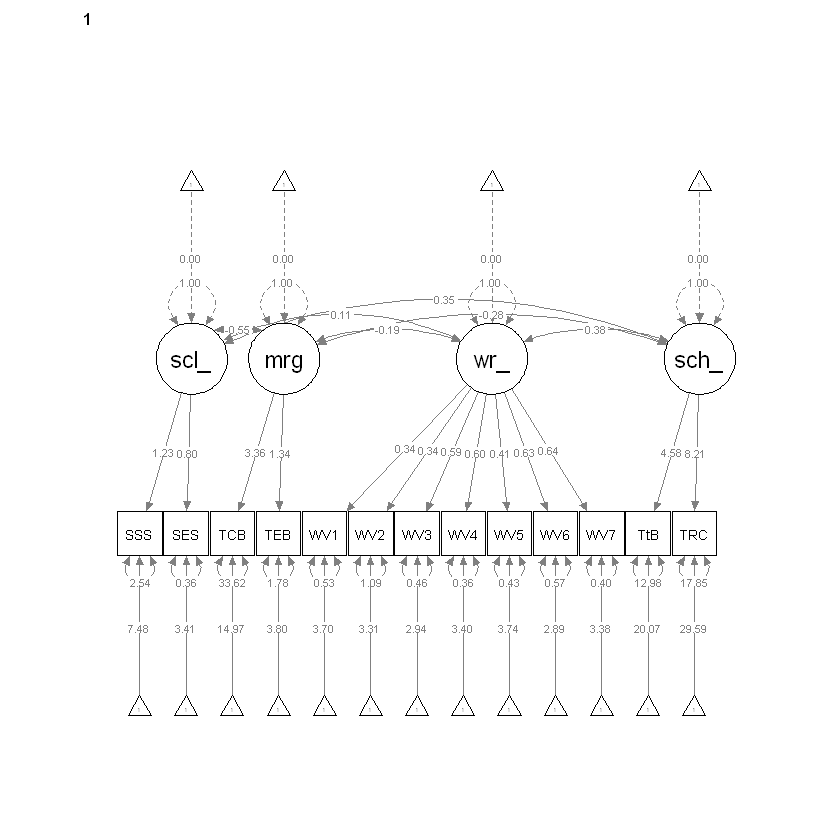

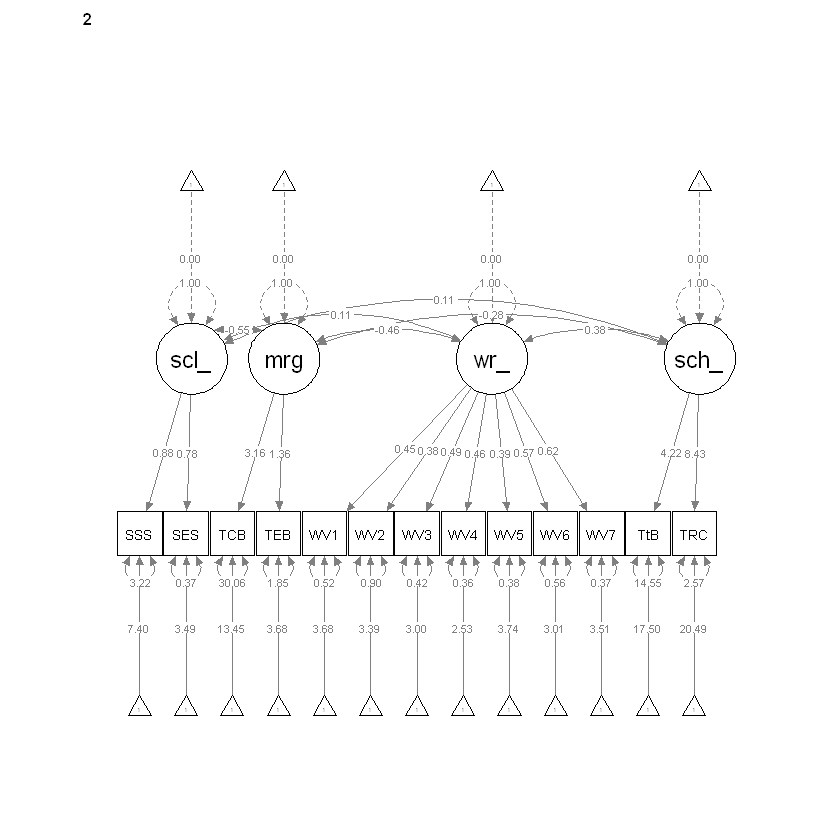

In [24]:
library(semPlot)
semPaths(object = fit5,whatLabels = "est",layout='tree2')